In [1]:
#conditional edges

from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.types import Command, interrupt

In [2]:
class State(TypedDict):
    nlist : Annotated[List[str], operator.add]
    

In [4]:
def node_a(state : State):
    return

def node_b(state : State) -> State:
    return(State(nlist = ["B"]))
def node_c(state : State) -> State:
    return(State(nlist = ["C"]))


In [7]:
def conditional_edge(state : State) -> Literal["b","c",END]:
    select = state["nlist"][-1]
    
    if select == "b":
        return "b"
    
    elif select == "c" :
        return "c"
    elif select == "q":
        return END
    else :
        return END

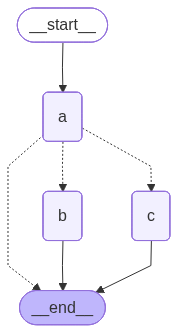

In [9]:
builder = StateGraph(State)

#adding nodes 

builder.add_node("a",node_a)
builder.add_node("b",node_b)
builder.add_node("c",node_c)


#adding edges

builder.add_edge(START,"a")
builder.add_edge("b",END)
builder.add_edge("c",END)
builder.add_conditional_edges("a", conditional_edge)
#compile and display

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
user = input('b,c, or q to quit : ')

input_state = State(
    nlist= [user]
)

graph.invoke(input_state)

{'nlist': ['c', 'C']}

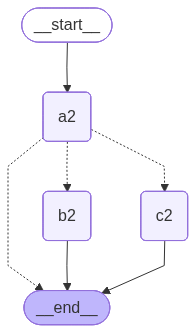

In [15]:
# without conditional function using command

def node_a2(state : State) -> Command[Literal["b2","c2",END]]:
    select = state["nlist"][-1]
    if select == "b2":
        next_node = "b2"
    elif select == "c2":
        next_node = "c2"
    elif select == "q" :
        next_node = END
    else:
        next_node = END
    return Command(
        update = State(nlist = [select]),
        goto = next_node
    )

def node_b2(state : State) -> State:
    return(State(nlist = ["B2"]))
def node_c2(state : State) -> State:
    return(State(nlist = ["C2"]))


builder2 = StateGraph(State)

#adding nodes 

builder2.add_node("a2",node_a2)
builder2.add_node("b2",node_b2)
builder2.add_node("c2",node_c2)


#adding edges

builder2.add_edge(START,"a2")
builder2.add_edge("b2",END)
builder2.add_edge("c2",END)

#compile and display

graph2 = builder2.compile()
display(Image(graph2.get_graph().draw_mermaid_png()))


In [17]:
while True :
    user = input("a2,b2 or q to quit")
    print(user)
    input_state = State(nlist = [user])
    
    result = graph2.invoke(input_state)
    print(result)
    
    if result['nlist'][-1] == "q":
        print("quit")
        break
    

a2
{'nlist': ['a2', 'a2']}
c2
{'nlist': ['c2', 'c2', 'C2']}
b2
{'nlist': ['b2', 'b2', 'B2']}
a2
{'nlist': ['a2', 'a2']}
c2
{'nlist': ['c2', 'c2', 'C2']}
q
{'nlist': ['q', 'q']}
quit
